In [ ]:
pip install catboost scikit-learn

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

# Загрузка данных и разделение на тестовую и обучающую выборки

In [5]:
# Загрузка датасета
data = pd.read_csv('CC50_data.csv')
data.head()

,"CC50, mM log10",MaxAbsEStateIndex,MaxAbsEStateIndex log10,MaxEStateIndex,MaxEStateIndex log10,MinAbsEStateIndex,MinAbsEStateIndex log10,MinEStateIndex,qed,qed log10,...,fr_piperdine,fr_piperzine,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_term_acetylene,fr_tetrazole,fr_thiophene,fr_urea
0,2.244234,5.094096,0.707067,5.094096,0.707067,0.387225,-0.412037,0.387225,0.417362,-0.379487,...,0,0,0,0,0,0,0,0,0,0
1,0.732620,3.961417,0.597851,3.961417,0.597851,0.533868,-0.272566,0.533868,0.462473,-0.334914,...,0,0,0,0,0,0,0,0,0,0
2,2.207210,2.627117,0.419479,2.627117,0.419479,0.543231,-0.265016,0.543231,0.260923,-0.583488,...,0,0,0,2,0,0,0,0,0,0
3,2.032843,5.097360,0.707345,5.097360,0.707345,0.390603,-0.408265,0.390603,0.377846,-0.422686,...,0,0,0,0,0,0,0,0,0,0
4,2.143861,5.150510,0.711850,5.150510,0.711850,0.270476,-0.567871,0.270476,0.429038,-0.367504,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Разделение на признаки и целевую переменную
X = data.drop(columns=['CC50, mM log10'])
y = data['CC50, mM log10']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Модель CatBoostRegressor

**CatBoostRegressor** чаще всего используется, когда у есть категориальные признаки, которые нужно эффективно обрабатывать. Эта модель прекрасно справляется с высокоразмерными данными и часто демонстрирует высокую точность, минимизируя вероятность переобучения. К сильным сторонам CatBoost можно отнести его автоматическую обработку категориальных переменных и высокую скорость обучения, в то время как среди слабых сторон стоит отметить необходимость выбора параметров для достижения оптимального результата и достаточно большие требования к памяти.

In [16]:
# Инициализация и обучение модели CatBoostRegressor
CatBoost = CatBoostRegressor(
    iterations=1000,           # кол-во деревьев
    learning_rate=0.01,        # скорость обучения
    depth=5,                  # глубина дерева;
    verbose=0,                # отключить вывод логов
)
CatBoost.fit(X_train, y_train)

In [17]:
# Предсказание на тестовой выборке
y_pred_CatBoost = CatBoost.predict(X_test)

In [18]:
# Оценка качества модели (MSE)
mse_CatBoost = mean_squared_error(y_test, y_pred_CatBoost)
print(f'MSE: {mse_CatBoost:.4f}')

# Корень из MSE для получения RMSE
rmse_CatBoost = np.sqrt(mse_CatBoost)
print(f'RMSE: {rmse_CatBoost:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_CatBoost = mean_absolute_error(y_test, y_pred_CatBoost)
print(f'MAE: {mae_CatBoost:.4f}')

# Коэффициент детерминации (R²)
r2_CatBoost = r2_score(y_test, y_pred_CatBoost)
print(f'R²: {r2_CatBoost:.4f}')

MSE: 0.2698
RMSE: 0.5194
MAE: 0.3776
R²: 0.4259


MSE = 0.2698 означает, что в среднем квадрат ошибок предсказаний относительно истинных значений составляет примерно 0.27. Это значение указывает на небольшой уровень ошибок, но само по себе оно не дает полной картины без учета масштабов данных. Вместе с тем, MAE = 0.3776 показывает, что в среднем значения предсказаний отличаются от истинных значений примерно на 0.38, что может считаться умеренным показателем, в зависимости от контекста задачи и масштаба величин.

Коэффициент детерминации R² = 0.4259 говорит о том, что около 42.59% вариации зависимой переменной объясняется моделью. Это достаточно низкий показатель, который указывает на то, что модель не захватывает значительную часть информации, содержащейся в данных. Идеальное значение R² равно 1, что говорит о том, что модель объясняет все вариации, а отрицательное значение указывает на то, что модель хуже, чем среднее значение целевой переменной.

# Модель LinearRegression (линейная регрессия)

**LinearRegression** применяется в ситуациях, когда данные хорошо поддаются линейному моделированию. Эта модель проста в интерпретации и очень быстрая в обучении. Сильные стороны включают простоту и возможность понимания модели, а среди недостатков – невозможность эффективно работать с нелинейными зависимостями и чувствительность к выбросам.

In [19]:
# Создание и обучение модели
LinReg = LinearRegression()
LinReg.fit(X, y)

LinearRegression()

In [20]:
# Предсказание на тестовой выборке
y_pred_LinReg = LinReg.predict(X_test)

In [21]:
# Оценка качества модели (MSE)
mse_LinReg = mean_squared_error(y_test, y_pred_LinReg)
print(f'MSE: {mse_LinReg:.4f}')

# Корень из MSE для получения RMSE
rmse_LinReg = np.sqrt(mse_LinReg)
print(f'RMSE: {rmse_LinReg:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_LinReg = mean_absolute_error(y_test, y_pred_LinReg)
print(f'MAE: {mae_LinReg:.4f}')

# Коэффициент детерминации (R²)
r2_LinReg = r2_score(y_test, y_pred_LinReg)
print(f'R²: {r2_LinReg:.4f}')

MSE: 0.2032
RMSE: 0.4507
MAE: 0.3245
R²: 0.5676


* _MSE (среднеквадратичная ошибка)_: **0.2032** — это значение говорит о том, что средний квадрат ошибок между предсказанными и фактическими значениями относительно невелик, что указывает на приемлемую точность модели.
* _RMSE (среднеквадратичная ошибка):_ **0.4507** — это более интерпретируемая метрика, показывающая, насколько в среднем отклоняются предсказания модели от реальных значений. Значение говорит о том, что предсказанные значения в среднем отклоняются от фактических на около 0.45 единиц.
* _MAE (средняя абсолютная ошибка):_ **0.3245** — данная метрика также показывает, насколько точны предсказания модели, показывая среднее абсолютное отклонение. Это значение говорит о том, что в среднем предсказания ошибаются на 0.32 единицы.
* _R² (коэффициент детерминации):_ **0.5676** — это значение указывает на то, что примерно 57% вариации зависимой переменной объясняется независимыми переменными модели. Это говорит о том, что модель адекватно улавливает часть структуры данных, но есть еще значительная доля вариации, объясняемая другими факторами или шумом.

Из этих результатов можно сделать вывод, что модель достаточно хорошо справляется с задачей предсказания, однако, есть возможность для улучшения.

# Модель DecisionTreeRegressor (регрессия лесом решений)

**DecisionTreeRegressor** полезна для работы с непрерывными и категориальными данными и не требует предварительной обработки (например, нормализации). Сильными сторонами данной модели являются легкость в интерпретации, а также способность захватывать сложные, нелинейные зависимости. Однако дерево решения склонно к переобучению, что является его слабой стороной, особенно при недостатке данных.

In [22]:
# Создание и обучение модели
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)

DecisionTreeRegressor()

In [23]:
# Предсказание на тестовой выборке
y_pred_tree_model = tree_model.predict(X_test)

In [24]:
# Оценка качества модели (MSE)
mse_tree_model = mean_squared_error(y_test, y_pred_tree_model)
print(f'MSE: {mse_tree_model:.4f}')

# Корень из MSE для получения RMSE
rmse_tree_model = np.sqrt(mse_tree_model)
print(f'RMSE: {rmse_tree_model:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_tree_model = mean_absolute_error(y_test, y_pred_tree_model)
print(f'MAE: {mae_tree_model:.4f}')

# Коэффициент детерминации (R²)
r2_tree_model = r2_score(y_test, y_pred_tree_model)
print(f'R²: {r2_tree_model:.4f}')

MSE: 0.0753
RMSE: 0.2743
MAE: 0.0815
R²: 0.8398


Результаты модели DecisionTreeRegressor на указанном датасете показывают следующие показатели: среднеквадратичная ошибка (MSE) составила **0.0753**, корень из среднеквадратичной ошибки (RMSE) — **0.2743**, средняя абсолютная ошибка (MAE) — **0.0815**, а коэффициент детерминации (R²) достиг значения **0.8398**.

Эти результаты указывают на то, что модель достаточно хорошо аппроксимирует целевой признак, особенно учитывая высокий R², который свидетельствует о 83.98% объясненной дисперсии. Низкие значения MSE, RMSE и MAE также подтверждают, что ошибки предсказаний невелики. В общем, модель демонстрирует достойные результаты и может быть полезна для дальнейшего анализа и предсказаний в рамках данного датасета.

# Модель Gradient Boosting (градиентный бустинг)

**Gradient Boosting** часто используется в ситуациях с большим количеством данных, где важна высокая точность. Эта модель помогает уменьшить ошибку за счет последовательного обучения. К сильным сторонам можно отнести гибкость и возможность обрабатывать сложные зависимости в данных. Тем не менее, среди её слабостей – высокая вычислительная сложность и возможность переобучения.

In [25]:
# Создание и обучение модели
gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)

GradientBoostingRegressor()

In [26]:
# Предсказание на тестовой выборке
y_pred_gb = gb_model.predict(X_test)

In [27]:
# Оценка качества модели (MSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'MSE: {mse_gb:.4f}')

# Корень из MSE для получения RMSE
rmse_gb = np.sqrt(mse_gb)
print(f'RMSE: {rmse_gb:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f'MAE: {mae_gb:.4f}')

# Коэффициент детерминации (R²)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'R²: {r2_gb:.4f}')

MSE: 0.1435
RMSE: 0.3789
MAE: 0.2629
R²: 0.6945


Модель Gradient Boosting демонстрирует удовлетворительные результаты на рассматриваемом датасете, обеспечивая хорошую точность прогнозов. Значение R² свидетельствует о достаточно высоком качестве модели, но есть возможность для дальнейшего улучшения.

# Модель полиномиальной регрессии

**Модель полиномиальной регрессии** лучше всего работает, когда данные имеют выраженную нелинейную зависимость. Она позволяет захватывать сложные взаимосвязи, что делает её полезной в ситуациях с криволинейными зависимостями. Сильные стороны полиномиальной регрессии включают её способность моделировать сложные функции, в то время как слабая сторона заключается в необходимости осторожного выбора степени полинома, чтобы избежать переобучения и потери интерпретируемости.

In [33]:
# Создание и обучение модели
degree = 2  # Степень полинома
polyreg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [34]:
# Предсказание на тестовой выборке
y_pred_polyreg = polyreg_model.predict(X_test)

In [35]:
# Оценка качества модели (MSE)
mse_polyreg = mean_squared_error(y_test, y_pred_polyreg)
print(f'MSE: {mse_polyreg:.4f}')

# Корень из MSE для получения RMSE
rmse_polyreg = np.sqrt(mse_polyreg)
print(f'RMSE: {rmse_polyreg:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_polyreg = mean_absolute_error(y_test, y_pred_polyreg)
print(f'MAE: {mae_polyreg:.4f}')

# Коэффициент детерминации (R²)
r2_polyreg = r2_score(y_test, y_pred_polyreg)
print(f'R²: {r2_polyreg:.4f}')

MSE: 0.0753
RMSE: 0.2744
MAE: 0.0822
R²: 0.8398


* _MSE (Среднеквадратичная ошибка) составляет:_ **0.0753**, что указывает на относительно небольшие ошибки в предсказаниях модели.
* _RMSE (Квадратный корень из среднеквадратичной ошибки) равен:_ **0.2744**, что позволяет легче интерпретировать ошибку в единицах исходных данных.
* _MAE (Средняя абсолютная ошибка) составляет:_ **0.0822**, что подтверждает высокую точность модели по сравнению с фактическими значениями.
* _R² (Коэффициент детерминации) равен:_ **0.8398**, что свидетельствует о том, что модель объясняет примерно 84% вариации зависимой переменной.

Вывод: модель полиномиальной регрессии демонстрирует хорошую предсказательную способность с высоким значением R² и низкими значениями ошибок, что говорит о её адекватности для анализа прологарифмированного признака в данном датасете.

# Сопоставление результатов

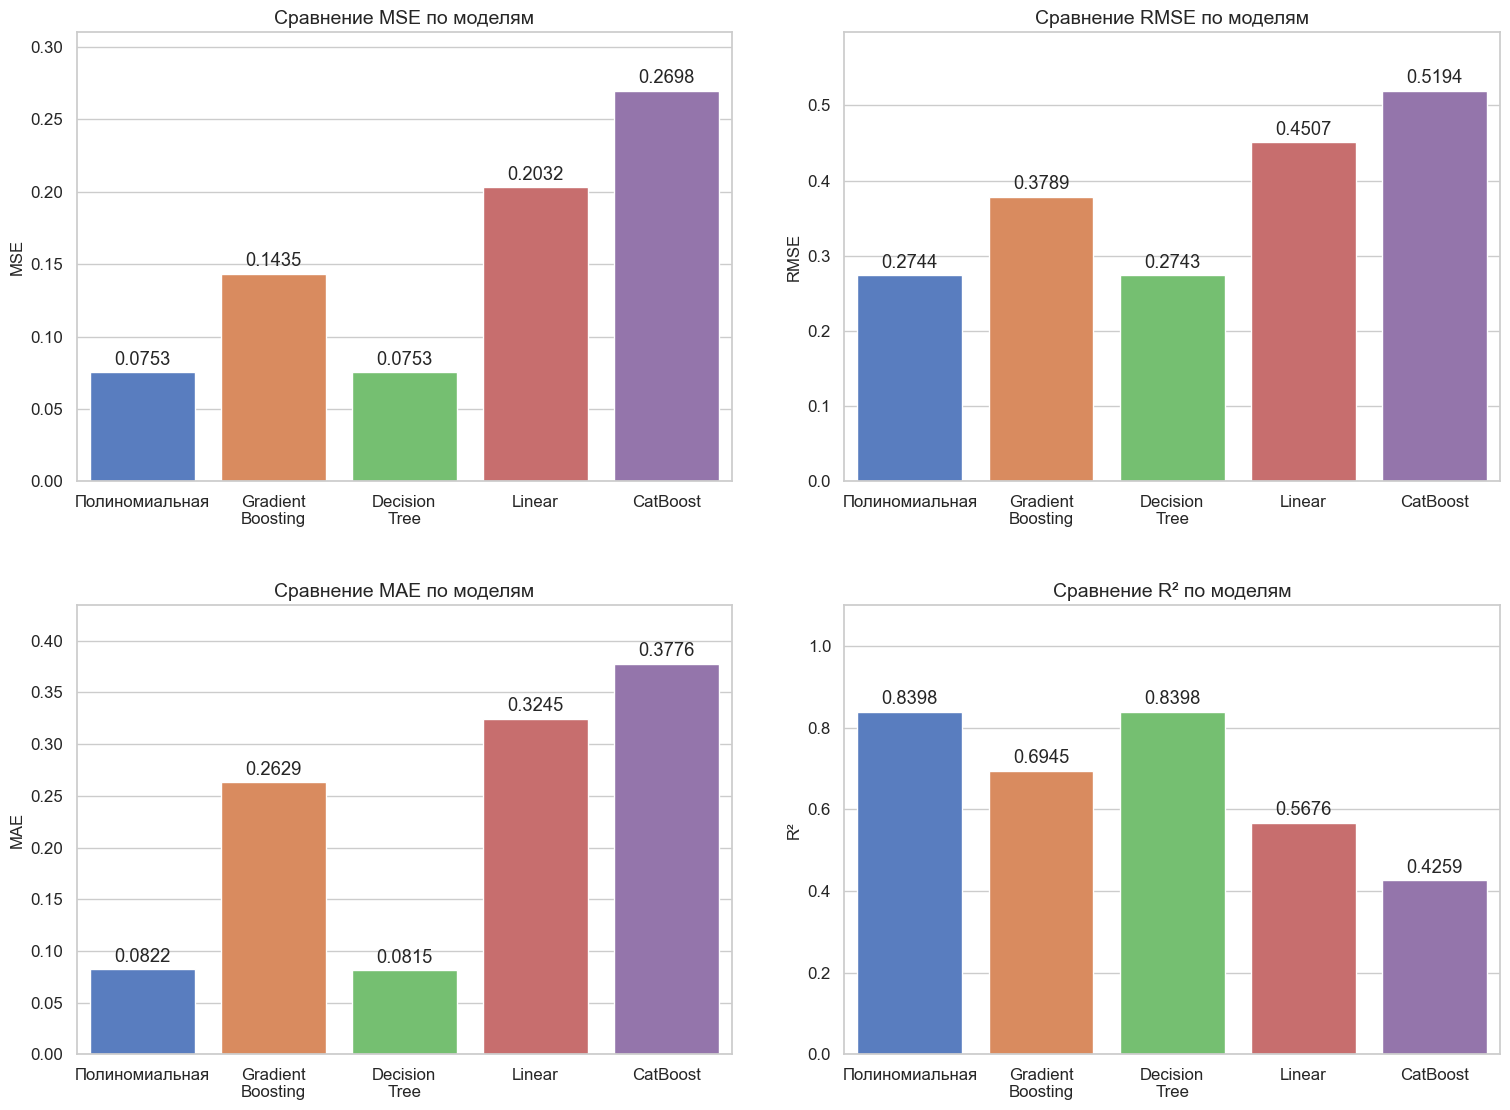

In [52]:
# Данные метрик (замените значения на реальные)
models = ['Полиномиальная', 'Gradient\nBoosting', 'Decision\nTree', 'Linear', 'CatBoost']

metrics = {
    'MSE': [mse_polyreg, mse_gb, mse_tree_model, mse_LinReg, mse_CatBoost],  # Пример значений
    'RMSE': [rmse_polyreg, rmse_gb, rmse_tree_model, rmse_LinReg, rmse_CatBoost],
    'MAE': [mae_polyreg, mae_gb, mae_tree_model, mae_LinReg, mae_CatBoost],
    'R²': [r2_polyreg, r2_gb, r2_tree_model, r2_LinReg, r2_CatBoost]
}

# Настройка стиля
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.figure(figsize=(16, 12))

# График для MSE
plt.subplot(2, 2, 1)
sns.barplot(x=models, y=metrics['MSE'], hue=models, dodge=False)
plt.title('Сравнение MSE по моделям', fontsize=14)
plt.ylabel('MSE', fontsize=12)
plt.ylim(0, max(metrics['MSE']) * 1.15)
plt.legend().remove()

# График для RMSE
plt.subplot(2, 2, 2)
sns.barplot(x=models, y=metrics['RMSE'], hue=models, dodge=False)
plt.title('Сравнение RMSE по моделям', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, max(metrics['RMSE']) * 1.15)
plt.legend().remove()

# График для MAE
plt.subplot(2, 2, 3)
sns.barplot(x=models, y=metrics['MAE'], hue=models, dodge=False)
plt.title('Сравнение MAE по моделям', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, max(metrics['MAE']) * 1.15)
plt.legend().remove()

# График для R2
plt.subplot(2, 2, 4)
bars = sns.barplot(x=models, y=metrics['R²'], hue=models, dodge=False)
plt.title('Сравнение R² по моделям', fontsize=14)
plt.ylabel('R²', fontsize=12)
plt.ylim(0, 1.1)

# Добавление значений на столбцы
for ax in plt.gcf().axes:
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.4f}", 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', 
            xytext=(0, 9), 
            textcoords='offset points')

plt.tight_layout(pad=3.0)
plt.show()

В результате анализа для прогнозирования значения целевой переменной CC50 наилучшие результаты продемонстрировали модели полиномиальной регрессии и регрессия с использованием метода леса решений. Тем не менее, существует вероятность, что успех модели леса решений может быть обусловлен переобучением, так как размер датасета составляет всего 1001 строчку и 349 столбцов, что создает условия для избыточной адаптации модели к обучающим данным.   

Полиномиальная регрессия показала такие впечатляющие результаты, вероятно, благодаря логарифмизации значений целевой переменной, что способствовало улучшению предсказательной способности этой модели. Полиномиальная регрессия представляет собой расширение линейной регрессии, которое позволяет моделировать сложные зависимости между переменными. Основное преимущество полиномиальной регрессии заключается в ее способности эффективно справляться с не линейными отношениями. В отличие от простой линейной модели, которая описывает зависимость в виде прямой линии, полиномиальная регрессия может использовать полиномы для более точного описания кривых и сложных паттернов в данных.  

Одним из ключевых аспектов является возможность подстраивания под характер данных. Благодаря включению полиномиальных терминов, таких как квадратичные и кубические, модель может лучше соответствовать форме распределения данных. Это особенно полезно, когда изучаемая зависимость имеет завитки или изменяющуюся скорость изменения.



В конечном итоге, хотя обе модели продемонстрировали хорошую эффективность, полиномиальная регрессия, похоже, оказалась более устойчивой и предпочтительной в данной задаче.